<a href="https://colab.research.google.com/github/Jordan-A-G-Henry/Machine-Learning-Projects/blob/main/Lecture18_Advanced_Python_Concepts(Object_Oriented_Programming).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

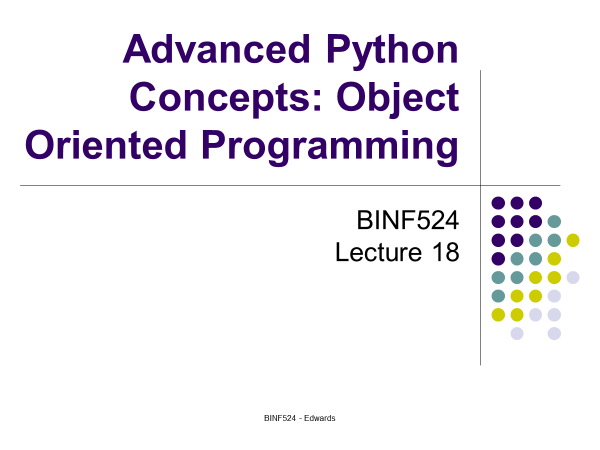

We've actually been using object-oriented programming the whole time...

The aim of object-oriented programming is to effectively create a new data-type. Storing an object, and a list of possible things that you can do to it.

Below:

Eg. 'l = [..... ' creates a new 'instance' of the 'list' datatype. This is a datatype that comes with Python, with various things that you can and cannot do with it. -- Called: Methods

In [ ]:
s = 'ACGTACGTACGTACGT'
print(s.count('T'))
print(s.replace('T','U'))

l = [6,5,4,3,2,1]
l.append(10)
l.sort()

s = set()
s.add(1)
s.add(2)

import Bio.SeqIO
thefile = open("ls_orchid.fasta")
for seq_record in Bio.SeqIO.parse(thefile, "fasta"):
    print(seq_record.id)
    print(seq_record.description)
    print(seq_record.seq)
thefile.close()

Using Classes & Objects:

Classes make instances of objects
- string is a class, 'ACGT' is an instance of a string.
- Make new instances using class name:
 - s = string(), d = dict(), s = set(), i = int(2)
 - For certain object types (eg. string), there are other,
 more convenient ways to do so. (Eg. The square brackets.)

Objects can hold information
- seq_record.id, seq_record.seq, seq_record.annotations
- Called data members or attributes

Objects can perform actions
- Eg. s = 'ACGT'; print s.count('a')
- The '.' notation is how  methods are called.
- Each datatype has specificic methods associated to it,
such that the count method associated with the string
datatype performs differently than one for a different 
datatype, because they are different methods.


Classes as Concepts:

Classes allow us to add new “concepts” to a language.
For example, prior to this lecture, we've been treating DNA sequences
as being the same as strings, even though there are things we'd want to do with a DNA sequence that make no sense at all with a string. When create a new class, effectively creating a new data-type for DNA sequences, we can load it up with all the things that you're supposed to be be able to do with a DNA sequence, and then pretend that it was all meatn to be.

Suppose we wanted to add a "DNA sequence" concept to python
- What information should "DNA sequence" capture?
 -  What is the name of this sequence?
 -  Where does it come from? (Organism, location in sequence etc.)
- What actions or operations should "DNA sequence" provide?
 - Length
 - Reverse
 - Complement
 - reverseComplement
 - transcribe
 - percent GC
 Etc. Etc.



DNA Sequence as a Class:

In [ ]:
class DNASeq:
    def reverse(self):
        return self.seq[::-1]
    def complement(self):
        d = {'A':'T','C':'G','G':'C','T':'A'}
        return ''.join(map(d.get,self.seq))
    def reverseComplement(self):
        return ''.join(reversed(self.complement()))
    def length(self):
        return len(self.seq)

ds = DNASeq()
ds.seq = 'ACGTACGTACGT'
ds.name = 'My sequence'
print(ds.complement(), ds.length(), ds.reverseComplement())

TGCATGCATGCA 12 ACGTACGTACGT


Recognise the 'def'. Here, we're just definng the methods that are associated to a particular class.

Note: By convention, the first parameter is called 'self', but actually that's not what matters. Note that it's the only parameter allowed to be in front of the '.' It refers to the instance of the class that we're currently working with. 

Note: Eg. 'ds.seq' is a data-member, and 'ds.length()' is a method which utilizes it.

**NOTE: It may seem that the methods are mismatched in the number of arguments they take. The key is that *the instance itself* is assumed to be the first argument. So, if you see a method with empty brackets, it's only argument is the instance upon whoich it's working.**

More examples:

In [ ]:
class DNASeq:
    #....
    def length(self):
        return len(self.seq)
    def freq(self,nuc):
        return self.seq.count(nuc)
    def percentGC(self):
        gccount = self.freq('C') + self.freq('G')
        return 100*float(gccount)/self.length()
    def __str__(self):
    	asstr = ">"+self.name+"\n"+self.seq
        return asstr

ds = DNASeq()
ds.seq = 'ACGTACGTACGT'
ds.name = 'My sequence'
print(ds.freq('C'),ds.freq('G'),ds.length(),ds.percentGC())
print(ds)

^Note again. the 'freq' method has two required arguments. We give only one. Why? Because the first argument is the instance itself.

Aside: If you were to change 'ds.freq('C')' to 'freq('C')', Python would instead of calling the method, assume you're calling a function called 'freq'. You haven't defined this function, so it would break.

**There's a large number of special methods, all indicated by the double underscores. They all do something extremely useful.**

The special method __init__ is called when a new instance is created.
- Used to initialize data-members.
- Forces class user to provide valid initial information.

In [ ]:
class DNASeq:
    def __init__(self,seq,name):
        self.seq = seq
        self.name = name
    #....

    def reverse(self):
        return self.seq[::-1]
    def complement(self):
        d = {'A':'T','C':'G','G':'C','T':'A'}
        return ''.join(map(d.get,self.seq))
    def reverseComplement(self):
        return ''.join(reversed(self.complement()))
    def length(self):
        return len(self.seq)
    def length(self):
        return len(self.seq)
    def freq(self,nuc):
        return self.seq.count(nuc)
    def percentGC(self):
        gccount = self.freq('C') + self.freq('G')
        return 100*float(gccount)/self.length()
    def __str__(self):
        asstr = ">"+self.name+"\n"+self.seq
        return asstr
    

ds = DNASeq('ACGTACGTACGTACGT', 'My sequence')
print(ds.freq('C'),ds.freq('G'),ds.length(),ds.percentGC())

4 4 16 50.0


^Note that we did not explicitly initalize the instance. It just did so on it's own. Hence, the power of special methods.

Sometimes __init__ is used to set up an "empty" instance.

---



---


- Other methods or data-members used to instantiate


In [ ]:
class DNASeq:
    def __init__(self):
        self.seq = ""
        self.name = ""
    def read(self,filename):
        self.seq = ''.join(open(filename).read().split())
	#....
  #Would need to also bring in everything else.
  #....

ds = DNASeq()
ds.name = 'Anthrax SASP'
ds.read('anthrax_sasp.nuc')
print(ds.freq('C'),ds.freq('G'),ds.length(),ds.percentGC())

Default arguments allow us to set up "empty", partial, or completely instantiated instances.

In [ ]:
class DNASeq:
    def __init__(self,seq="",name=""):
        self.seq = seq
        self.name = name
    def read(self,filename):
        self.seq = ''.join(open(filename).read().split())
    #....

ds = DNASeq(name='Anthrax SASP')
ds.read('anthrax_sasp.nuc')
print(ds.freq('C'),ds.freq('G'),ds.length(),ds.percentGC())

More realistically, rather than sticking a class definition at the top of a program, you would do all of this in a separate module. And then import it, as normal. 

In [ ]:
class DNASeq:
    def __init__(self,seq="",name=""):
        self.seq = seq
        self.name = name
    def read(self,filename):
        self.seq = ''.join(open(filename).read().split())
    def reverse(self):
        return self.seq[::-1]
    def complement(self):
        d = {'A':'T','C':'G','G':'C','T':'A'}
        return ''.join(map(d.get,self.seq))
    def reverseComplement(self):
        return ''.join(reversed(self.complement()))
    def length(self):
        return len(self.seq)
    def freq(self,nuc):
        return self.seq.count(nuc)
    def percentGC(self):
        gccount = self.freq('C') + self.freq('G')
        return 100*float(gccount)/self.length()
	  def __str__(self):
    	  asstr = ">"+self.name+"\n"+self.seq
        return asstr

Overall:
1. Describe class in a module of the same name.
2. Access using an import statement.

**The Benefits: When importing fuctions from a module without a class definition, we have to deal with extremely long function names, or we use 'from _ import _'. Then, we have to hope none of the modules we've imported have functions with the same names, or Python might mix them up. When working with our own "custom data-type", we get to assume that the program knows exactly how to handle this datatype.**

In [ ]:
from DNASeq import DNASeq

ds = DNASeq('ACGTACGTACGTACGT','My sequence')
print(ds.complement(),ds.length(),ds.reverseComplement())
print(ds.freq('C'),ds.freq('G'),ds.length(),ds.percentGC())
print(ds)

ds = DNASeq()
ds.read('anthrax_sasp.nuc')
print(ds.complement(),ds.length(),ds.reverseComplement())
print(ds.freq('C'),ds.freq('G'),ds.length(),ds.percentGC())
print(ds)

^Shows the benefits of using default arguments. You can either give the arguments up-front, to change them, or do so in the next line.

What if we had a class for codon tables. What should it provide?.....

Method calls, for instance "codons":

codons.read(filename)
 - stores the contents of filename in the codon_table object.

codons.amino_acid(codon)
- returns amino-acid symbol for codon

codons.is_init(codon)
- returns true if codon is an initiation codon false, otherwise

codons.get_ambig_aa (codon)
- returns single amino-acid represented by a codon with N's

codons.startswith_init(seq)
- returns true if DNA sequence seq starts with init codon

codons.translate(seq,frame)
- returns amino-acid sequence for DNA sequence seq



A Class for Codon Tables

In [ ]:
from DNASeq import *
from codon_table import *
import sys

if len(sys.argv) < 3:
    print("Require codon table and DNA sequence on command-line.")
    sys.exit(1)

codons = codon_table()
codons.read(sys.argv[1])

seq = DNASeq()
seq.read(sys.argv[2])

if codons.startswith_init(seq):
    print("Initial codon is an initiation codon")

for frame in (1,2,3):
    print("Frame",frame,"(forward):",codons.translate(seq,frame))

(Shell) In codon_table.py
- Indicates general organization.

In [ ]:
class codon_table:
    def __init__(self):
        self.table = {}
    def read(self,filename):
        # magic
    def amino_acid(self,codon):
        # magic
        return aa
    def is_init(self,codon):
        # magic
        return result
    def get_ambig_aa(self,codon):
        # magic
        return aa
    def startswith_init(self,seq):
        # magic
        return result
	  def translate(self,seq,frame):
        # magic
        return aaseq

Comparison of function-based vs class-based approach. This is how the rest of your code would differ.

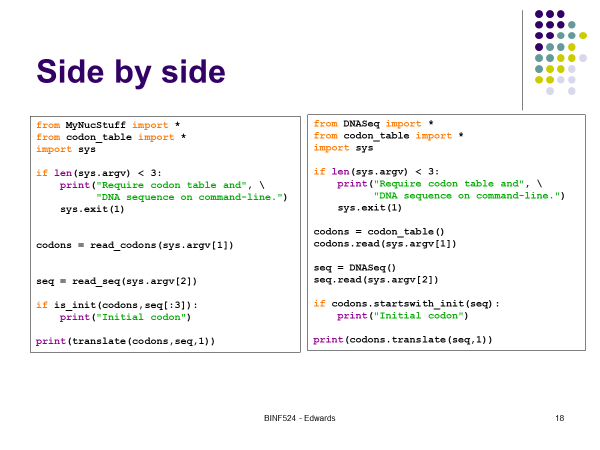